# 1. Preliminary

## 1.1 Context

## 1.2 Imports

In [661]:
import os, sys, time

import nltk
import spacy

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

## 1.3 Loading data

In [662]:
# our file

data = "./data/source/"
os.listdir(data)

['superheroes_nlp_dataset.csv']

In [663]:
# load dataframe

fn = data + 'superheroes_nlp_dataset.csv'

df = pd.read_csv(fn)

In [664]:
df.head()

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. First Tour

## 2.1 display

In [665]:
df.head(5)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
0,3-D Man,"Delroy Garrett, Jr.","Delroy Garrett, Jr.",6,"Delroy Garrett, Jr. grew up to become a track ...",NaN,85,30,60,60,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,514A (Gotham),Bruce Wayne,NaN,10,He was one of the many prisoners of Indian Hil...,NaN,100,20,30,50,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,A-Bomb,Richard Milhouse Jones,Richard Milhouse Jones,20,"Richard ""Rick"" Jones was orphaned at a young ...","On rare occasions, and through unusual circu...",80,100,80,100,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Aa,Aa,NaN,12,Aa is one of the more passive members of the P...,NaN,80,50,55,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aaron Cash,Aaron Cash,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,NaN,80,10,25,40,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [666]:
df.sample(10)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
163,Bird-Man,Henry Hawk,Henry Hawk,-,Henry Hawk was a criminal hand picked by the ...,Bird-Man did have a degree of superhuman stren...,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
893,Miss Martian,M'gann M'orzz,M'gann M'orzz,12,The origin others know: there are two differ...,Miss Martians abilities come from her Martian ...,80,85,60,100,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1374,Vili,Vili,Vili Borson,14,"Vili with his 2 brothers Odin and Ve, were par...","Vili had an Asgardian body, he possessed super...",100,55,70,85,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
816,Lodestone,Unknown,Unknown,-,Phillipe Bazin was the crimelord whose operati...,"Uses magnetism for levitation, force attacks, ...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,Lady Deathstrike,Yuriko Oyama,Yuriko Oyama,6,"Yuriko Oyama is the daughter of Kenji Oyama, a...",Lady Deathstrike is superhumanly strong and ...,80,30,40,85,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
957,Nightwing (Arkham),Dick Grayson,"Richard ""Dick"" John Grayson",8,"After the Christmas Eve Incident, Dick's paren...",Master Detective: Grayson is a world class det...,90,20,80,45,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
250,Cameron Hicks,NaN,NaN,5,"Cameron Hicks has lived a hard life, the scars...",NaN,75,10,25,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
530,Gorilla Grodd (CW),Grodd,Grodd,12,"Grodd, also known as Gorilla Grodd, is a silve...",After Grodd was struck by the energy of the p...,90,65,65,80,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
197,Black Spider,Eric Needham,NaN,7,"As a young man, Eric Needham became addicted t...",NaN,90,10,35,35,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
726,Kathryn Janeway,Kathryn Janeway,Kathryn M. Janeway,6,Janeway notable for being the first female of ...,NaN,90,10,20,25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [667]:
df.tail(5)

,name,real_name,full_name,overall_score,history_text,powers_text,intelligence_score,strength_score,speed_score,durability_score,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
1445,Zatanna,Zatanna Zatara,Zatanna Zatara,10,Zatanna is the daughter of adventurer John Zat...,Zatanna is genetically talented with her magi...,90,10,25,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1446,Zero,DWN-∞: Zero,DWN-∞: Zero,18,Zero was created by the late Dr. Albert Wily ...,NaN,80,100,100,100,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1447,Zoom (New 52),Hunter Zolomon,NaN,20,"Hunter Zolomon is better known as Zoom, a spee...",After tricking Barry Allen and Wally West into...,95,50,100,75,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1448,Zoom,Hunter Zolomon,Hunter Zolomon,9,Hunter Zolomon had a troubled relationship wi...,"Zoom is able to alter time, to make himself ev...",75,10,100,30,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1449,Zzzax,NaN,NaN,5,Zzzax was the product of an accident that occu...,NaN,45,80,75,95,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


## 2.2 Structure

In [668]:
df.shape

(1450, 81)

In [669]:
df.dtypes

name                   object
real_name              object
full_name              object
overall_score          object
history_text           object
                       ...   
has_super_speed       float64
has_durability        float64
has_stamina           float64
has_agility           float64
has_super_strength    float64
Length: 81, dtype: object

In [670]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   name                              1448 non-null   object 
 1   real_name                         1301 non-null   object 
 2   full_name                         956 non-null    object 
 3   overall_score                     1450 non-null   object 
 4   history_text                      1360 non-null   object 
 5   powers_text                       1086 non-null   object 
 6   intelligence_score                1450 non-null   int64  
 7   strength_score                    1450 non-null   int64  
 8   speed_score                       1450 non-null   int64  
 9   durability_score                  1450 non-null   int64  
 10  power_score                       1450 non-null   int64  
 11  combat_score                      1450 non-null   int64  
 12  superp

In [671]:
df.dtypes.value_counts()

float64    50
object     25
int64       6
dtype: int64

In [672]:
tmp = df.nunique()
tmp

name                  1448
real_name             1068
full_name              840
overall_score           93
history_text          1349
                      ... 
has_super_speed          2
has_durability           2
has_stamina              2
has_agility              2
has_super_strength       2
Length: 81, dtype: int64

In [673]:
tmp[tmp <10]

alignment                           3
gender                              2
has_electrokinesis                  2
has_energy_constructs               2
has_mind_control_resistance         2
has_matter_manipulation             2
has_telepathy_resistance            2
has_mind_control                    2
has_enhanced_hearing                2
has_dimensional_travel              2
has_element_control                 2
has_size_changing                   2
has_fire_resistance                 2
has_fire_control                    2
has_dexterity                       2
has_reality_warping                 2
has_illusions                       2
has_energy_beams                    2
has_peak_human_condition            2
has_shapeshifting                   2
has_heat_resistance                 2
has_jump                            2
has_self-sustenance                 2
has_energy_absorption               2
has_cold_resistance                 2
has_magic                           2
has_telekine

In [674]:
tmp[tmp>1000]

name                1448
real_name           1068
history_text        1349
powers_text         1061
superpowers         1315
first_appearance    1092
img                 1363
dtype: int64

## 2.3 NaN and duplicated

In [675]:
df.isna().mean().sort_values()

aliases               0.000000
overall_score         0.000000
teams                 0.000000
alter_egos            0.000000
intelligence_score    0.000000
                        ...   
full_name             0.340690
relatives             0.378621
base                  0.394483
place_of_birth        0.456552
skin_color            0.880690
Length: 81, dtype: float64

<AxesSubplot:>

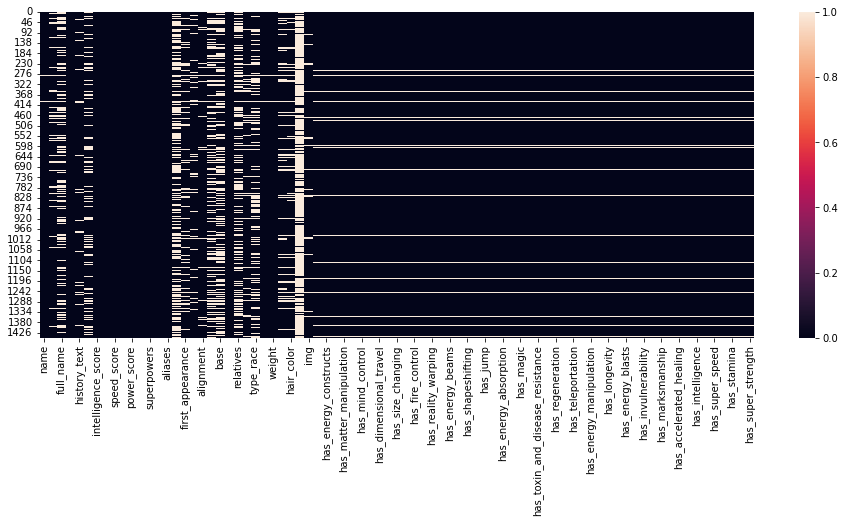

In [676]:
tmp = df.isna().mean()

fig, ax = plt.subplots(1,1, figsize=(16, 6))
sns.heatmap(df.isna())


In [677]:
df.duplicated().sum()

0

## 2.4 Data inspection

In [678]:
df.describe(include=np.number)

,intelligence_score,strength_score,speed_score,durability_score,power_score,combat_score,has_electrokinesis,has_energy_constructs,has_mind_control_resistance,has_matter_manipulation,...,has_flight,has_accelerated_healing,has_weapons_master,has_intelligence,has_reflexes,has_super_speed,has_durability,has_stamina,has_agility,has_super_strength
count,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1383.000000,1383.000000,1383.000000,1383.000000,...,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,79.103448,39.458621,46.389655,56.193103,66.913793,68.175862,0.090383,0.076645,0.075922,0.050615,...,0.266811,0.308026,0.409978,0.433116,0.428778,0.386840,0.511931,0.532899,0.562545,0.528561
std,25.048393,34.385566,29.205902,31.647711,33.225127,29.540420,0.286834,0.266124,0.264969,0.219289,...,0.442453,0.461844,0.492007,0.495686,0.495080,0.487203,0.500038,0.499097,0.496252,0.499364
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,10.000000,25.000000,30.000000,40.000000,55.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,30.000000,40.000000,55.000000,72.500000,75.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,95.000000,65.000000,65.000000,85.000000,100.000000,90.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [679]:
df.describe(include=np.object)

/tmp/ipykernel_26967/3211851552.py:1: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,name,real_name,full_name,overall_score,history_text,powers_text,superpowers,alter_egos,aliases,place_of_birth,...,teams,relatives,gender,type_race,height,weight,eye_color,hair_color,skin_color,img
count,1448,1301,956,1450,1360,1086,1450,1450,1450,788,...,1450,901,1305,1043,1448,1448,1186,1202,173,1363
unique,1448,1068,840,93,1349,1061,1315,522,947,448,...,419,844,2,67,120,246,25,31,15,1363
top,3-D Man,Unknown,Unknown,6,Childhood Trauma Robert Bruce Banner was the s...,No known powers.,[],[],[''],Earth-1,...,[],None,Male,Human,-,-,Blue,Black,Green,/pictures2/portraits/11/050/10038.jpg?v=156096...
freq,1,22,15,162,3,7,67,928,475,31,...,900,23,970,529,365,426,368,339,30,1


# 3. Cleaning

## 3.1 select columns

In [680]:
tmp = df.dtypes
tmp

name                   object
real_name              object
full_name              object
overall_score          object
history_text           object
                       ...   
has_super_speed       float64
has_durability        float64
has_stamina           float64
has_agility           float64
has_super_strength    float64
Length: 81, dtype: object

In [681]:
tmp[tmp =="object"]

name                object
real_name           object
full_name           object
overall_score       object
history_text        object
powers_text         object
superpowers         object
alter_egos          object
aliases             object
place_of_birth      object
first_appearance    object
creator             object
alignment           object
occupation          object
base                object
teams               object
relatives           object
gender              object
type_race           object
height              object
weight              object
eye_color           object
hair_color          object
skin_color          object
img                 object
dtype: object

In [682]:
cols = ["name", "overall_score", "history_text"]
df = df[cols]
df.head()

,name,overall_score,history_text
0,3-D Man,6,"Delroy Garrett, Jr. grew up to become a track ..."
1,514A (Gotham),10,He was one of the many prisoners of Indian Hil...
2,A-Bomb,20,"Richard ""Rick"" Jones was orphaned at a young ..."
3,Aa,12,Aa is one of the more passive members of the P...
4,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...


## 3.2 drop NaN

In [683]:
df.isna().sum()

name              2
overall_score     0
history_text     90
dtype: int64

In [684]:
df = df[df.name.notna()]
df = df[df.history_text.notna()]
df.head()

,name,overall_score,history_text
0,3-D Man,6,"Delroy Garrett, Jr. grew up to become a track ..."
1,514A (Gotham),10,He was one of the many prisoners of Indian Hil...
2,A-Bomb,20,"Richard ""Rick"" Jones was orphaned at a young ..."
3,Aa,12,Aa is one of the more passive members of the P...
4,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...


In [685]:
df.isna().mean()

name             0.0
overall_score    0.0
history_text     0.0
dtype: float64

## 3.3 recast overall_score

In [686]:
df.overall_score.dtype

dtype('O')

In [687]:
try : 
    df.overall_score.astype(float)
except Exception as e : 
    print(e)

could not convert string to float: '∞'


In [688]:
def extract_score(txt) : 
    
    try : 
        return float(txt)
    except Exception as e : 
        return np.nan
    
    
    

In [689]:
df["_score"] = df.overall_score.apply(extract_score)
df.head()

,name,overall_score,history_text,_score
0,3-D Man,6,"Delroy Garrett, Jr. grew up to become a track ...",6.0
1,514A (Gotham),10,He was one of the many prisoners of Indian Hil...,10.0
2,A-Bomb,20,"Richard ""Rick"" Jones was orphaned at a young ...",20.0
3,Aa,12,Aa is one of the more passive members of the P...,12.0
4,Aaron Cash,5,Aaron Cash is the head of security at Arkham A...,5.0


In [690]:
df._score.describe()

count    1249.000000
mean       14.249800
std        21.886399
min         1.000000
25%         6.000000
50%         8.000000
75%        13.000000
max       237.000000
Name: _score, dtype: float64

/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='_score'>

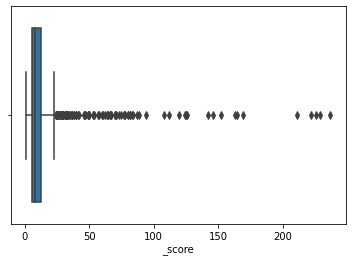

In [691]:
sns.boxplot(df._score)

In [692]:
df[df._score.isna()]

,name,overall_score,history_text,_score
11,Abraxas,∞,"Born within the abstract entity Eternity, Abra...",NaN
48,Ammo,-,Most of Ammo's early history is unrevealed. ...,NaN
53,Ando Masahashi,-,Ando Masahashi is Hiro Nakamura's best friend ...,NaN
101,Atom III,-,At first Cray was widely believed to be Ray Pa...,NaN
145,Beak,-,Barnell Bohusk has lived a difficult life sinc...,NaN
...,...,...,...,...
1411,Wiz Kid,-,Takashi Matsuya was placed as a student at Sai...,NaN
1423,Wong,-,"Wong is the descendant and look-alike of Kan, ...",NaN
1433,Yellow Claw,-,The criminal mastermind known as the Yellow Cl...,NaN
1435,Yellowjacket III,-,Darren Cross was the CEO of Cross Technologi...,NaN


In [693]:
df[df._score.isna()].overall_score.value_counts()

-    98
∞    12
Name: overall_score, dtype: int64

In [694]:
df = df[df.overall_score != "-"]
df[df._score.isna()].overall_score.value_counts()

∞    12
Name: overall_score, dtype: int64

In [695]:
df[df._score.isna()]

,name,overall_score,history_text,_score
11,Abraxas,∞,"Born within the abstract entity Eternity, Abra...",NaN
153,Beyonder,∞,"Within a pocket realm in the Negative Zone, th...",NaN
174,Black Alice,∞,"A teenage girl with an interest in magick, Lor...",NaN
376,Death Of The Endless,∞,Death of the Endless came into existence short...,NaN
450,Eru Iluvatar,∞,Eru is the supreme deity of Arda. He was the s...,NaN
482,First Spinjitzu Master,∞,"Long before time had a name, the First Spinjit...",NaN
526,Golden Master's Mech,∞,While some of the Nindroids under Cryptor retr...,NaN
845,Man Of Miracles,∞,The being known as Mother is the creator of t...,NaN
882,Michael Demiurgos,∞,"Many years ago, during Lucifer's rebellion in ...",NaN
1272,The Beyonder (Earth-1298),∞,Known as the Beyonder due to the fact that he ...,NaN


In [696]:
df.sort_values("_score",).tail(20)

,name,overall_score,history_text,_score
934,Nadakhan,163,"Nadakhan is the captain of the Sky Pirates, th...",163.0
1293,The Overlord,165,"Before Ninjago's creation, there were two kind...",165.0
522,Goblin Force,169,The Goblin Force was born at the beginning of ...,169.0
421,Dracula,211,The man later known as Dracula was originally...,211.0
110,Aztar,222,Since the beginnings of human civilization the...,222.0
527,Golden Ninja,226,"Lloyd becomes the Golden Ninja, and fights the...",226.0
393,Devilman,229,Transformation Akira is first seen walking hom...,229.0
538,Great Evil Beast,237,The Great Evil Beast was formed when God utter...,237.0
11,Abraxas,∞,"Born within the abstract entity Eternity, Abra...",NaN
153,Beyonder,∞,"Within a pocket realm in the Negative Zone, th...",NaN


In [697]:
df = df[df._score.notnull()]
df.sort_values("_score",).tail(20)

,name,overall_score,history_text,_score
631,Imperiex,87,"The embodiment of entropy, Imperiex takes the ...",87.0
732,Khanjikhan,89,"At an unknown point in time, Khanjikhan marrie...",89.0
1143,Sensei Yang,94,"At an unknown point in time, Yang went on a qu...",94.0
980,Omega,108,When garmadon and Lloyd were about to destroy ...,108.0
389,Destruction Of The Endless,112,Destruction is the fourth eldest of the Endles...,112.0
407,Doctor Strange (Classic),120,Stephen Strange was born to Eugene and Bever...,120.0
420,Dr Manhattan,124,Jonathan Osterman was born in 1929. His fathe...,124.0
983,One-Above-All,125,Undoubtedly the most mysterious character wit...,125.0
916,Monstrox,126,The Book of Monsters was formerly a necromance...,126.0
416,Dormammu,142,Born untold thousands or even millions of year...,142.0


# 4. Exploratory Data Analysis

## 4.1 _score

In [698]:
df.describe()

,_score
count,1249.000000
mean,14.249800
std,21.886399
min,1.000000
25%,6.000000
50%,8.000000
75%,13.000000
max,237.000000


/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='_score'>

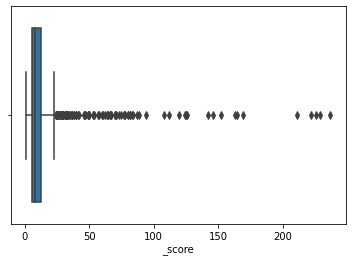

In [699]:
sns.boxplot(df._score)

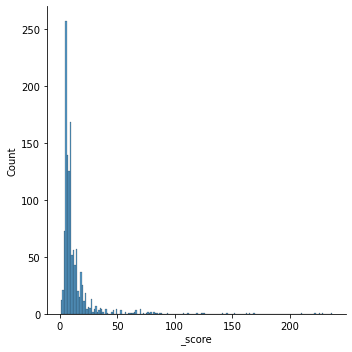

In [700]:
sns.displot(df._score)

In [701]:
df.sort_values("_score").head(20)

,name,overall_score,history_text,_score
129,Bathound,1,Ace was the guide dog of a blind native Americ...,1.0
994,Paul Blart,1,Paul Blart is a mall cop. Everyday he protect...,1.0
261,Captain Cold (CW),2,Leonard Snart wasn’t the smartest person ever ...,2.0
1427,Wyatt Wingfoot,2,Wyatt Wingfoot is a member of the Keewazi trib...,2.0
665,Jaime Lannister,2,Jaime is the eldest son of Joanna Lannister an...,2.0
758,Kool-Aid Man,2,Before he was officially the Kool-Aid Man in 1...,2.0
22,Agent Bob,2,"Bob, Agent of Hydra, is a sidekick of Deadpo...",2.0
292,Chope,2,On the first night of the Tournament of Elemen...,2.0
259,Captain Boomerang,2,"George ""Digger"" Harkness was raised in poverty...",2.0
90,Arnold Flass,2,Like many officers on the Gotham City Police D...,2.0


In [702]:
df.sort_values("_score").tail(20)

,name,overall_score,history_text,_score
631,Imperiex,87,"The embodiment of entropy, Imperiex takes the ...",87.0
732,Khanjikhan,89,"At an unknown point in time, Khanjikhan marrie...",89.0
1143,Sensei Yang,94,"At an unknown point in time, Yang went on a qu...",94.0
980,Omega,108,When garmadon and Lloyd were about to destroy ...,108.0
389,Destruction Of The Endless,112,Destruction is the fourth eldest of the Endles...,112.0
407,Doctor Strange (Classic),120,Stephen Strange was born to Eugene and Bever...,120.0
420,Dr Manhattan,124,Jonathan Osterman was born in 1929. His fathe...,124.0
983,One-Above-All,125,Undoubtedly the most mysterious character wit...,125.0
916,Monstrox,126,The Book of Monsters was formerly a necromance...,126.0
416,Dormammu,142,Born untold thousands or even millions of year...,142.0


In [703]:
df["_log_score"] = np.log(df._score)
df["_log_score"].describe()

count    1249.000000
mean        2.279247
std         0.727329
min         0.000000
25%         1.791759
50%         2.079442
75%         2.564949
max         5.468060
Name: _log_score, dtype: float64

/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='_log_score'>

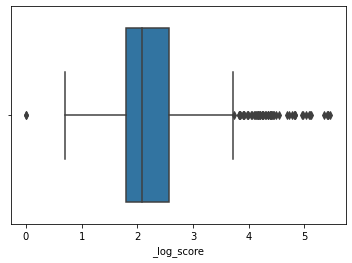

In [704]:
sns.boxplot(df._log_score)

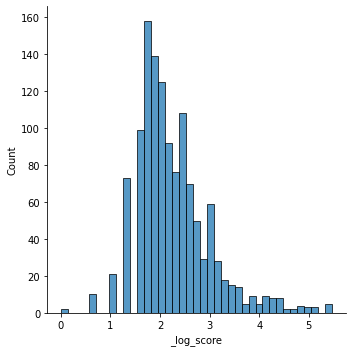

In [705]:
sns.displot(df._log_score)

In [706]:
df.drop(columns="overall_score", inplace=True)
df.head()

,name,history_text,_score,_log_score
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",6.0,1.791759
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,10.0,2.302585
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ...",20.0,2.995732
3,Aa,Aa is one of the more passive members of the P...,12.0,2.484907
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,5.0,1.609438


## 4.1 Length

In [707]:
df.describe(include="object")

,name,history_text
count,1249,1249
unique,1249,1244
top,3-D Man,Childhood Trauma Robert Bruce Banner was the s...
freq,1,3


/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='name'>

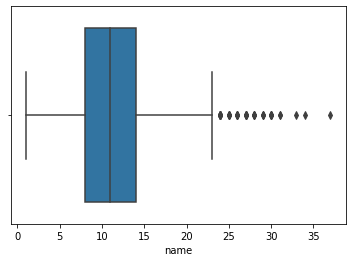

In [708]:
tmp = df.name.str.len()
sns.boxplot(tmp)

/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='history_text'>

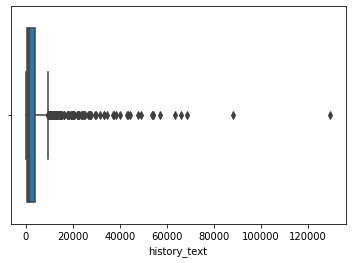

In [709]:
tmp = df.history_text.str.len()
sns.boxplot(tmp)

In [710]:
df["_len_name"] = df.name.str.len()
df["_len_history_text"] = df.history_text.str.len()

df.head()

,name,history_text,_score,_log_score,_len_name,_len_history_text
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",6.0,1.791759,7,509
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,10.0,2.302585,13,3755
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ...",20.0,2.995732,6,5849
3,Aa,Aa is one of the more passive members of the P...,12.0,2.484907,2,5924
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,5.0,1.609438,10,123


In [711]:
df._len_name.describe()

count    1249.000000
mean       11.572458
std         5.372032
min         1.000000
25%         8.000000
50%        11.000000
75%        14.000000
max        37.000000
Name: _len_name, dtype: float64

In [712]:
df.sort_values("_len_name").head(20)

,name,history_text,_score,_log_score,_len_name,_len_history_text
1352,V,The background and identity of V is largely un...,7.0,1.945910,1,1315
1426,Wu,"Wu was born to the First Spinjitzu Master, alo...",18.0,2.890372,2,941
3,Aa,Aa is one of the more passive members of the P...,12.0,2.484907,2,5924
655,IT,It arrived on Earth in a massive cataclysmic e...,16.0,2.772589,2,714
427,Ed,"Ed and Edna, visited Jay at the Ninjas' new he...",5.0,1.609438,2,1593
531,GPL,The IT Guys had the idea of making the Garma M...,9.0,2.197225,3,300
274,Cat,Shirlee Bryant was hired by Malcolm Donalbain ...,4.0,1.386294,3,3308
95,Ash,Ash was born as a descendant of previous Eleme...,11.0,2.397895,3,143
1265,T-X,The T-X is a model of Terminator produced by ...,12.0,2.484907,3,3106
1063,Ray,"As a teenager, Ray was very poor, wearing ragg...",8.0,2.079442,3,2097


In [713]:
df.sort_values("_len_name").tail(20)

,name,history_text,_score,_log_score,_len_name,_len_history_text
254,Captain America (Venomized),"In all of history, only two men have received ...",14.0,2.639057,27,522
633,Incredible Hulk (Universal),"Robert Bruce Banner was born on Thursday, Dece...",17.0,2.833213,27,2043
615,Hulk (Stark Gauntlet) (MCU),After Tony created a new gaunlet Hulk uses it ...,47.0,3.850148,27,65
568,Harry Osborn (Raimi Trilogy),Harry Osborn is Peter Parker's closest friend....,7.0,1.945910,28,4038
713,Kai (The LEGO Ninjago Movie),"Kai's attitude is more serious, like Cole in t...",8.0,2.079442,28,512
672,Jay (The LEGO Ninjago Movie),"A young boy ventures into an old relic shop, w...",8.0,2.079442,28,4842
968,Nya (The LEGO Ninjago Movie),"A boy ventures into an old relic shop, where h...",9.0,2.197225,28,4836
757,Koko (The LEGO Ninjago Movie),Koko met Garmadon in a war under the identity ...,7.0,1.945910,29,313
306,Cole (The LEGO Ninjago Movie),"At a unknown point of time, Cole joined the Se...",8.0,2.079442,29,146
24,Agent Coulson (Destroyer Gun),S.H.I.E.L.D. recovered the wreckage of the Des...,10.0,2.302585,29,416


In [714]:
df.sort_values("_len_history_text").head(20)

,name,history_text,_score,_log_score,_len_name,_len_history_text
614,Hulk Earth-5901,Unknown,13.0,2.564949,15,7
1373,Vigilante,Vigilante I,6.0,1.791759,9,11
1420,Wonder Woman (Kingdom Come),Earth-22 Wonder woman,23.0,3.135494,27,21
1108,Rocket,Icon's friend and partner.,6.0,1.791759,6,26
914,Mongul,He is Mongul the elder son.,17.0,2.833213,6,27
877,Merlin,One of the most powerful Sorcerers.,50.0,3.912023,6,35
537,Grayven,Grayven was the third son of Darkseid.,20.0,2.995732,7,38
1425,Wotan,One of the main enemies of Doctor Fate.,28.0,3.332205,5,39
248,Caliban,Caliban is a mutant in the X-Men series,5.0,1.609438,7,39
356,Dark Kahn,The combination of Darkseid and Shao Khan,71.0,4.262680,9,41


In [715]:
df.sort_values("_len_history_text").tail(20)

,name,history_text,_score,_log_score,_len_name,_len_history_text
1243,Storm,"Ororo Munroe, also known as Storm, is the de...",8.0,2.079442,5,33374
1190,Solid Snake,"In 1970, Solid Snake was foreseen in a prophet...",16.0,2.772589,11,34491
691,John Constantine,John Constantine is a gritty supernatural det...,5.0,1.609438,16,37265
79,Archangel,Warren Kenneth Worthington III is the mutan...,6.0,1.791759,9,37578
407,Doctor Strange (Classic),Stephen Strange was born to Eugene and Bever...,120.0,4.787492,24,38541
370,Deadpool,Not too much is known about Deadpool's chil...,12.0,2.484907,8,39906
652,Iron Man,"Anthony Stark, son of industrialist and inve...",14.0,2.639057,8,42892
1251,Supergirl,Kara Zor-El is the daughter of Superman's un...,19.0,2.944439,9,43548
1280,The Flash,"Barry Allen is The Flash, the fastest man ali...",16.0,2.772589,9,44147
1254,Superman (Post-Crisis),Kal-El was born on the doomed planet Krypto...,28.0,3.332205,22,47710


# 

In [716]:
corr = df.corr()
corr

,_score,_log_score,_len_name,_len_history_text
_score,1.000000,0.801440,0.019685,0.104184
_log_score,0.801440,1.000000,0.051564,0.117783
_len_name,0.019685,0.051564,1.000000,-0.104403
_len_history_text,0.104184,0.117783,-0.104403,1.000000


<AxesSubplot:>

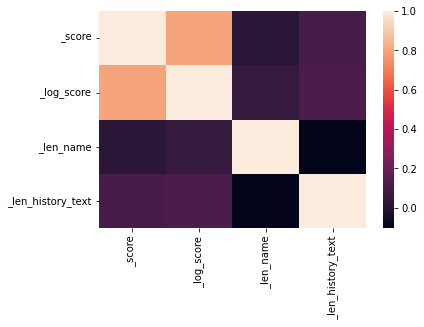

In [717]:
sns.heatmap(corr)

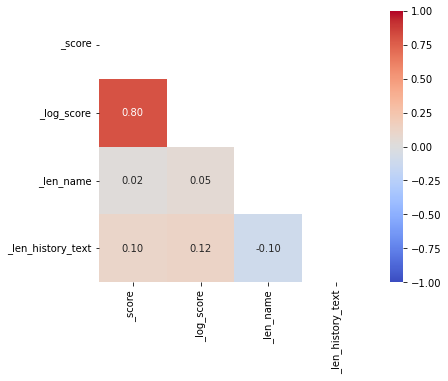

In [718]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap="coolwarm", annot=True, fmt=".2f", square=True)

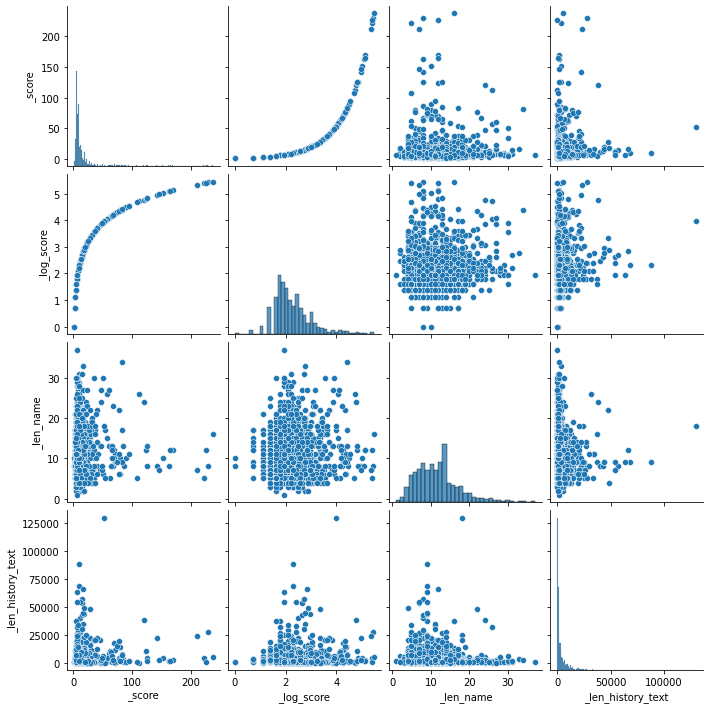

In [719]:
sns.pairplot(df)

In [720]:
df["_cat"] = pd.cut(df._score, bins=5, labels=list("edcba"))
df.head()

,name,history_text,_score,_log_score,_len_name,_len_history_text,_cat
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",6.0,1.791759,7,509,e
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,10.0,2.302585,13,3755,e
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ...",20.0,2.995732,6,5849,e
3,Aa,Aa is one of the more passive members of the P...,12.0,2.484907,2,5924,e
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,5.0,1.609438,10,123,e


In [721]:
df.sort_values("_cat").head()

,name,history_text,_score,_log_score,_len_name,_len_history_text,_cat
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",6.0,1.791759,7,509,e
951,Night King,The Night King was a First Man that was captur...,13.0,2.564949,10,584,e
950,Nick Fury,"The eldest of three children, Nicholas Joseph...",6.0,1.791759,9,17921,e
949,Nick Fury (MCU),"Nicholas ""Nick"" Joseph Fury was a former Colon...",8.0,2.079442,15,3845,e
948,Neuro,Neuro was born as the descendant of the Elemen...,13.0,2.564949,5,203,e


In [722]:
df.sort_values("_cat").tail()

,name,history_text,_score,_log_score,_len_name,_len_history_text,_cat
538,Great Evil Beast,The Great Evil Beast was formed when God utter...,237.0,5.468060,16,5295,a
527,Golden Ninja,"Lloyd becomes the Golden Ninja, and fights the...",226.0,5.420535,12,266,a
393,Devilman,Transformation Akira is first seen walking hom...,229.0,5.433722,8,27732,a
110,Aztar,Since the beginnings of human civilization the...,222.0,5.402677,5,3796,a
421,Dracula,The man later known as Dracula was originally...,211.0,5.351858,7,23504,a


In [723]:
df["_log_cat"] = pd.cut(df._log_score, bins=5, labels=list("edcba"))
df.head()

,name,history_text,_score,_log_score,_len_name,_len_history_text,_cat,_log_cat
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",6.0,1.791759,7,509,e,d
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,10.0,2.302585,13,3755,e,c
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ...",20.0,2.995732,6,5849,e,c
3,Aa,Aa is one of the more passive members of the P...,12.0,2.484907,2,5924,e,c
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,5.0,1.609438,10,123,e,d


In [724]:
df.sort_values("_log_cat").head()

,name,history_text,_score,_log_score,_len_name,_len_history_text,_cat,_log_cat
758,Kool-Aid Man,Before he was officially the Kool-Aid Man in 1...,2.0,0.693147,12,1937,e,e
665,Jaime Lannister,Jaime is the eldest son of Joanna Lannister an...,2.0,0.693147,15,3577,e,e
994,Paul Blart,Paul Blart is a mall cop. Everyday he protect...,1.0,0.000000,10,284,e,e
70,Aquababy,Arthur Curry Jr. was born the son of the Atla...,2.0,0.693147,8,397,e,e
129,Bathound,Ace was the guide dog of a blind native Americ...,1.0,0.000000,8,439,e,e


In [725]:
df.sort_values("_log_cat").tail()

,name,history_text,_score,_log_score,_len_name,_len_history_text,_cat,_log_cat
945,Nekron,"Nekron is the Lord of the Unliving, one of the...",80.0,4.382027,6,1427,d,a
362,Darth Nihilus,Darth Nihilus (pronounced /ˈnaɪ.ə.lɨs/) was a ...,84.0,4.430817,13,3158,d,a
416,Dormammu,Born untold thousands or even millions of year...,142.0,4.955827,8,22389,c,a
1293,The Overlord,"Before Ninjago's creation, there were two kind...",165.0,5.105945,12,1187,b,a
1311,Thor (Odin Force),"Thor has traveled across the realms, battling ...",83.0,4.418841,17,7165,d,a


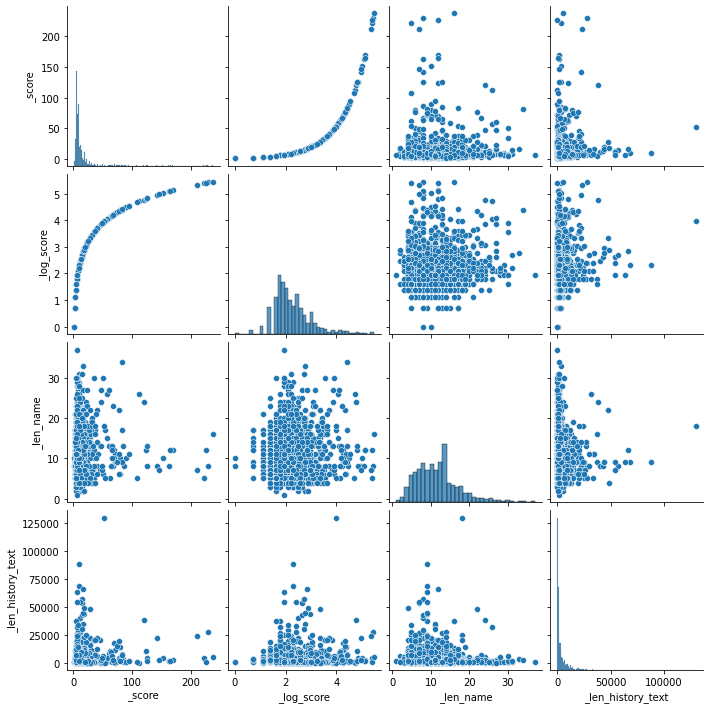

In [726]:
sns.pairplot(df,)

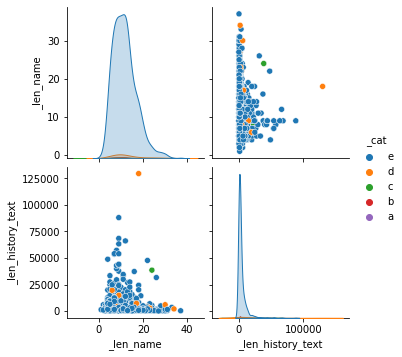

In [727]:
sns.pairplot(df.drop(columns=["_score", "_log_score"]),hue="_cat")

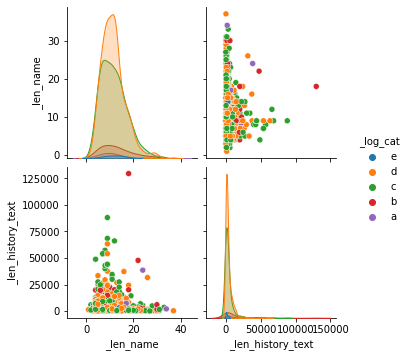

In [729]:
sns.pairplot(df.drop(columns=["_score", "_log_score"]),hue="_log_cat")

In [730]:
df

,name,history_text,_score,_log_score,_len_name,_len_history_text,_cat,_log_cat
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",6.0,1.791759,7,509,e,d
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,10.0,2.302585,13,3755,e,c
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ...",20.0,2.995732,6,5849,e,c
3,Aa,Aa is one of the more passive members of the P...,12.0,2.484907,2,5924,e,c
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,5.0,1.609438,10,123,e,d
...,...,...,...,...,...,...,...,...
1445,Zatanna,Zatanna is the daughter of adventurer John Zat...,10.0,2.302585,7,1532,e,c
1446,Zero,Zero was created by the late Dr. Albert Wily ...,18.0,2.890372,4,48848,e,c
1447,Zoom (New 52),"Hunter Zolomon is better known as Zoom, a spee...",20.0,2.995732,13,395,e,c
1448,Zoom,Hunter Zolomon had a troubled relationship wi...,9.0,2.197225,4,7173,e,c


In [731]:
df.to_csv("data/cleaned/df.csv", index=False)

# 5. Working with text SEPARATE NOTEBOOK

##  5.1 10 random texts 

In [ ]:
df.rename(columns={"name" : "_name"}, inplace=True)

In [ ]:
df.sample(10)

In [ ]:
df_samp = df.sample(20)
df_samp

In [ ]:
for idx, ser in df_samp.iterrows(): 

    _len = len(ser["history_text"])
    _score = round(ser['_score'], 2)
    _log_score = round(ser['_log_score'], 2)
    _txt = "\t"+ser["history_text"].strip()
    txt_1 = f"name : {ser['_name']}, score/log_score : {_score}/{_log_score}, len_txt :{_len}, history:\n"
    
    print(txt_1+_txt[:300]+ "..." + "\n\n")

In [ ]:
def print_sample(sub_df, n_samp=10, n_char=1000) : 
    """ """
    
    if n_samp < len(sub_df): 
        df_samp = sub_df.sample(n_samp)
    else : 
        df_samp = sub_df.copy()
    
    for idx, ser in df_samp.iterrows(): 

        _len = len(ser["history_text"])
        _score = round(ser['_score'], 2)
        _log_score = round(ser['_log_score'], 2)
        _txt = "\n"+ser["history_text"].strip()
        txt_1 = f"name : {ser['_name']}, score/log_score : {_score}/{_log_score}, len_txt :{_len}, history:\n"

        print(txt_1+_txt[:n_char]+ "..." + "\n\n\n")

In [ ]:
df_a = df[df._cat=="a"]
df_a.head()

In [ ]:
print_sample(df_a)

In [ ]:
print_sample(df[df._cat=="b"])

In [ ]:
print_sample(df[df._cat=="b"])

In [ ]:
print_sample(df[df._cat=="c"])

In [ ]:
print_sample(df[df._cat=="d"])

In [ ]:
print_sample(df[df._cat=="e"])

# work on One

In [ ]:
txt = df.history_text.sample(1)
txt = txt.values[0]
txt

In [ ]:
txt = txt.lower()
txt

In [ ]:
txt = txt.strip().replace("  ", " ")

In [ ]:
txt[:30]

In [ ]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize

In [ ]:
raw_tokens_list  = word_tokenize(txt)
raw_tokens_list[:30]

In [ ]:
len(raw_tokens_list)

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

In [ ]:
stop_words = set(stopwords.words('english'))
print(stop_words)

In [ ]:
cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

In [ ]:
cleaned_tokens_list[:50]

In [ ]:
len(cleaned_tokens_list)

In [ ]:
from nltk.tokenize import RegexpTokenizer

In [ ]:



raw_tokens_list[:50]

In [ ]:
raw_tokens_list

In [ ]:
cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

In [ ]:
cleaned_tokens_list[:50]

In [ ]:
len(cleaned_tokens_list)

In [ ]:
def process_text(txt, rejoin=False) : 
    
    txt = txt.lower().strip()
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(txt)
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    if rejoin : 
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

In [ ]:
corpus = list(df.history_text.values)
corpus[:3]

In [ ]:
corpus = "".join(corpus)
corpus[:5000]

In [ ]:
cleaned_corpus = process_text(corpus)
cleaned_corpus

In [ ]:
len(cleaned_corpus)

In [ ]:
tmp = pd.Series(cleaned_corpus).value_counts()

In [ ]:
len(df)

In [ ]:
tmp.describe()

In [ ]:
sns.displot(tmp.values)

In [ ]:
tmp.head(30)

In [ ]:
tmp.tail(30)

In [ ]:
sns.countplot(pd.Series(cleaned_corpus))

In [ ]:
list_unique_words = tmp[tmp==1]
list_unique_words[:30]

In [ ]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:30]

In [ ]:
def process_text(txt, rejoin=False) : 
    
    txt = txt.lower().strip()
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(txt)
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    non_unique_tokens_list = [w for w in cleaned_tokens_list not in list_unique_words]
    more_than_3 =  [w for w in non_unique_tokens_list if len(w) > 3 ]
    
    alpha_num = [w for w in more_than_3 if w.isalpha()]
    
    
    if rejoin : 
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

In [ ]:
"a12".isalpha()

In [ ]:
cleaned_corpus[:100]

In [ ]:
len(set(cleaned_corpus))

In [ ]:



from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')

In [ ]:
nltk.download('omw-1.4')

In [ ]:
lemmatizer.lemmatize("cars")

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
 
ps = PorterStemmer()

In [ ]:
lemm_cleanned_corpus = [lemmatizer.lemmatize(i) for i in cleaned_corpus ]

In [ ]:
len(set(lemm_cleanned_corpus))

In [ ]:
def process_text(txt, rejoin=True, lemm_or_stemm = "stem") : 
    
    txt = txt.lower().strip()
    
    tokenizer = RegexpTokenizer(r"\w+")
    raw_tokens_list = tokenizer.tokenize(txt)
    
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]
    
    non_unique_tokens_list = [w for w in cleaned_tokens_list if w not in list_unique_words]
    
    more_than_3 =  [w for w in non_unique_tokens_list if len(w) > 3 ]
    
    alpha_num = [w for w in more_than_3 if w.isalpha()]
    
    if lemm_or_stemm == "lem" : 
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_num ]
    else : 
        trans = PorterStemmer()
        trans_text = [trans.stem(i) for i in alpha_num ]
    
    if rejoin : 
        return " ".join(trans_text)
    
    return trans_text

In [ ]:
df["cleaned_history"] = df.history_text.apply(lambda i : process_text(i))

In [ ]:
df.history_text

In [ ]:
df.cleaned_history

In [ ]:
!pip install sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf = TfidfVectorizer()

In [ ]:
res = tf.fit_transform(df.cleaned_history)

In [ ]:
res

In [ ]:
res = res.toarray()

In [ ]:
res.